<a href="https://colab.research.google.com/github/balbaross/fictional-engine/blob/main/Divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MODULE 2 PROJECT**

# The divorce code
*By Kabir, Rodrigue and Sertac*



**Research objectives**

This project aims to advance our understanding of the factors that contribute to divorce.

Specifically, it seeks to:


*   Predict the likelihood of divorce
*  Identify the decisive factors leading to divorce






### Research questions

*   To what extent can demographic, socioeconomic, relational,and psychosocial variables predict the likelihood of divorce among married couples?
*   Which factors are the strongest determinants of divorce in this population?



# **Research hypotheses**

*  H1: Couples who marry at a younger age are significantly more likely to divorce than those who marry later, regardless of income and education.

*   H2: Pre-marital cohabitation increases the risk of divorce in love marriages, but decreases the risk in arranged marriages.


In [5]:
# About the dataset
# synthetic dataset from kaggle.com (https://www.kaggle.com/datasets/vanpatangan/divorce-prediction/data)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [7]:
url = "https://raw.githubusercontent.com/Rodrigu87/Module-2-Project-CAS-UniBe/main/divorce_df.csv"
df = pd.read_csv(url)
df.head(10)

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1
5,26,10,0,High School,Full-time,44605,Same Religion,0,6.825964,3,...,0,0,0,6.909350,3,Love,1,0,4.628149,0
6,35,10,2,High School,Full-time,73454,Different Religion,1,3.775491,1,...,0,0,0,7.351375,1,Love,1,0,5.753932,0
7,31,17,1,High School,Unemployed,59491,Not Religious,1,6.613021,4,...,0,0,0,8.709813,2,Love,0,0,7.010559,1
8,25,5,1,Bachelor,Full-time,40944,Not Religious,0,2.963345,0,...,0,0,0,8.727489,3,Arranged,1,0,2.428385,0
9,30,1,0,PhD,Full-time,46819,Same Religion,1,3.612109,1,...,1,0,0,5.939285,1,Arranged,1,0,8.750676,1


# Part A. Descriptive statistics on divorces and non-divorced couples


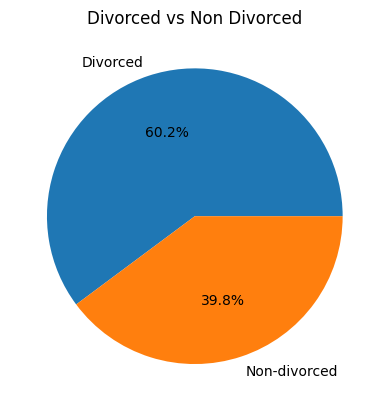

In [9]:
plt.pie(df['divorced'].value_counts(),labels = ['Divorced', 'Non-divorced'], autopct = '%1.1f%%')
plt.title("Divorced vs Non Divorced")
plt.show()

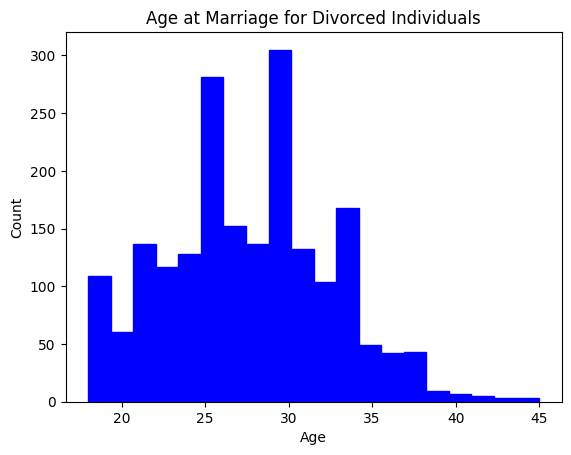

In [8]:
#Kabi,Instead of plotting only the divorced group, compare the distributions of divorced vs. not divorced on the same axis.”

# Filter the data to include only divorced individuals
divorced_data = df[df['divorced'] == 1]

# Plot the histogram of age at marriage for divorced individuals
divorced_data['age_at_marriage'].plot(kind='hist', fill=True, histtype='step', color='blue', bins=20)
plt.title("Age at Marriage for Divorced Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [17]:
print("Descriptive statistics for 'age_at_marriage':")
display(df['age_at_marriage'].describe())

Descriptive statistics for 'age_at_marriage':


,age_at_marriage
count,5000.000000
mean,27.583600
std,4.855978
min,18.000000
25%,24.000000
50%,28.000000
75%,31.000000
max,45.000000


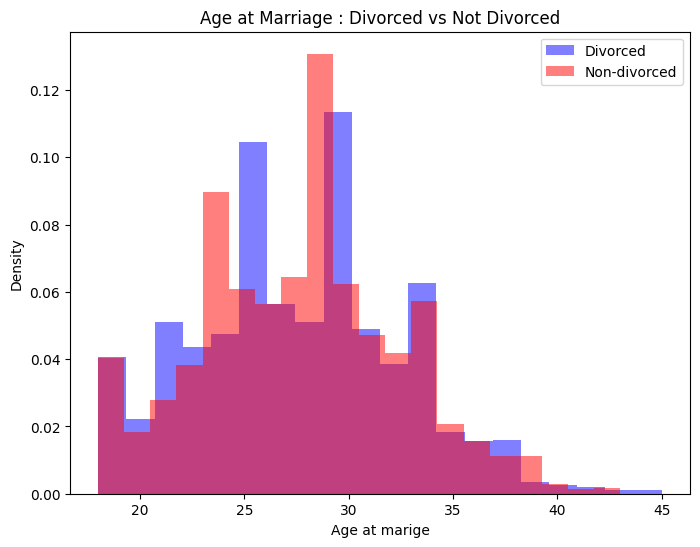

In [30]:
# compare the distributions of divorced vs. not divorced on the same axis.

divorced_data = df[df['divorced'] == 1 ].dropna()
Non_divorced_data = df[df['divorced'] == 0 ].dropna()

# Plot the histogram of age at marriage for divorced individuals
plt.figure(figsize=(8, 6))
divorced_data['age_at_marriage'].plot(kind='hist', density='True', alpha=0.5, color='blue', bins=20)
Non_divorced_data['age_at_marriage'].plot(kind='hist', density='True', alpha=0.5, color='red', bins=20)
plt.title("Age at Marriage : Divorced vs Not Divorced")
plt.xlabel("Age at marige")
plt.ylabel("Density")
plt.legend(['Divorced', 'Non-divorced'])
plt.show()

In [11]:
data = df['divorced'].value_counts()
data.describe()

,count
count,2.000000
mean,2500.000000
std,719.834703
min,1991.000000
25%,2245.500000
50%,2500.000000
75%,2754.500000
max,3009.000000


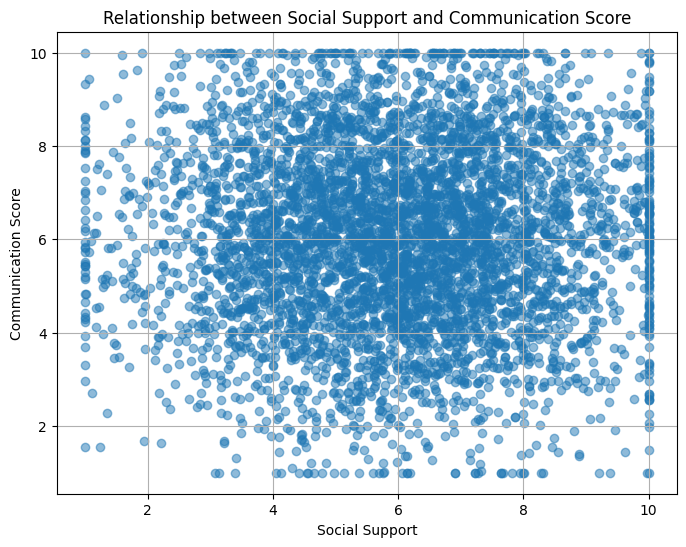

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['social_support'], df['communication_score'], alpha=0.5)
plt.title('Relationship between Social Support and Communication Score')
plt.xlabel('Social Support')
plt.ylabel('Communication Score')
plt.grid(True)
plt.show()



# Part B. inferential statistics
Compare divorced vs non-divorced couples on social_support




===== social_support =====
Shapiro test: p0=0.000, p1=0.000


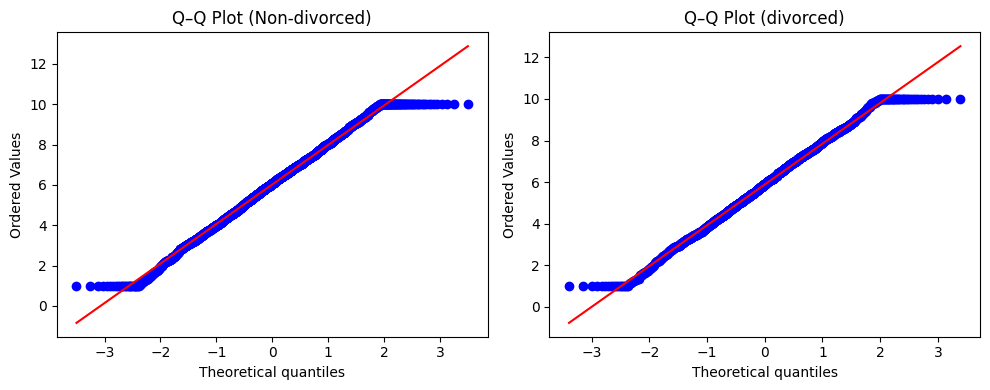

Levene’s test (equal var?): p=0.686


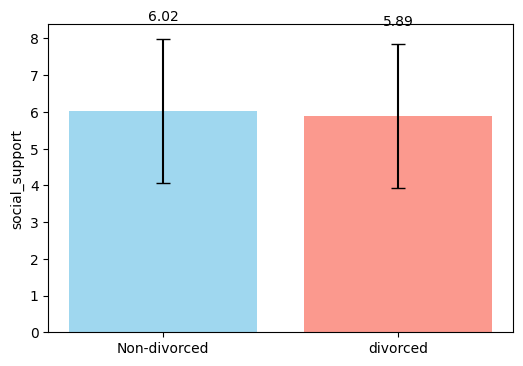

Mann–Whitney U statistic = 3113948.500
p-value = 0.0177


In [13]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["social_support"]

# Hypotheses
#H0 = There is no significant difference in social support between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their level of social support.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)

Compare Divorced VS Non_divorced couples on communication score


===== communication_score =====
Shapiro test: p0=0.000, p1=0.000


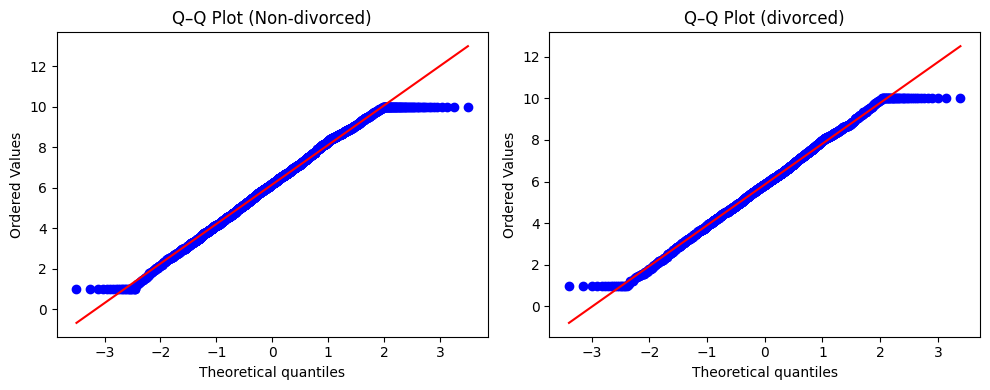

Levene’s test (equal var?): p=0.939


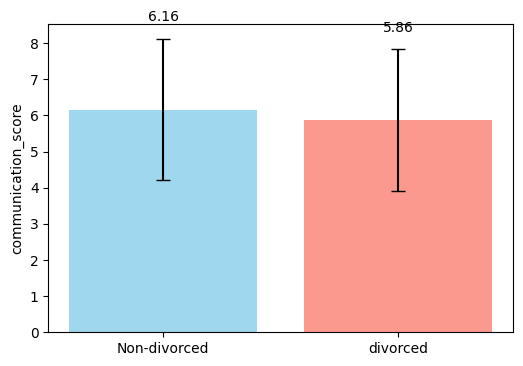

Mann–Whitney U statistic = 3261200.500
p-value = 0.0000


In [14]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["communication_score"]

# Hypotheses
#H0 = There is no significant difference in communication score between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their communication.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)

Compare Divorced VS Non_divorced couples on financial stress


===== financial_stress_level =====
Shapiro test: p0=0.000, p1=0.000


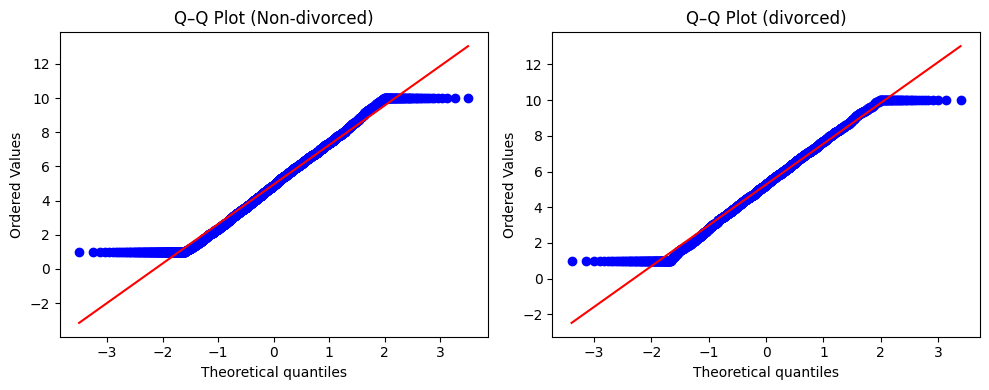

Levene’s test (equal var?): p=0.279


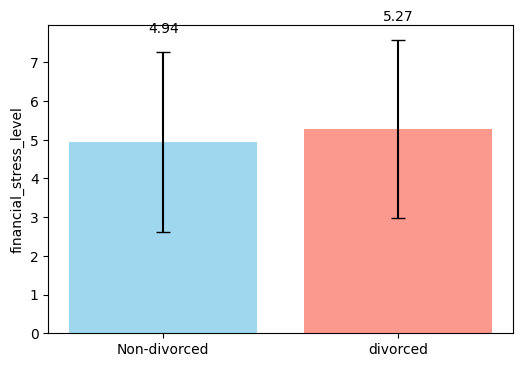

Mann–Whitney U statistic = 2743363.000
p-value = 0.0000


In [15]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["financial_stress_level"]

# Hypotheses
#H0 = There is no significant difference in communication score between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their communication.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)